In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Import Data

In [2]:
WTI = pd.read_excel("Data/Cushing_OK_WTI_Spot_Price_FOB_Daily.xlsx", dtype='unicode', skiprows=4)
WCS = pd.read_excel("Data/wcs-daily-bblUSD.xlsx", dtype='unicode', skiprows=2)

# 2. Rename Columns and Drop Extra Columns

In [3]:
WTI.rename(columns={"Day": "Date", "Series ID: PET.RWTC.D Dollars per Barrel": "WTI"}, inplace=True)
WCS.drop(['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 6'], inplace=True, axis=1)
WCS.rename(columns={"Unnamed: 0": "Date", "Unnamed: 5": "WCS"}, inplace=True)

# 3. Convert String Dates to DateTime

In [4]:
WTI['DateTime'] = pd.to_datetime(WTI['Date'], format="%m/%d/%Y")

In [5]:
WCS['DateTime'] = pd.to_datetime(WCS['Date'], format="%Y-%m-%d %H:%M:%S.%f")

In [6]:
WTI

,Date,WTI,DateTime
0,08/11/2020,41.53,2020-08-11
1,08/10/2020,41.94,2020-08-10
2,08/7/2020,41.16,2020-08-07
3,08/6/2020,41.93,2020-08-06
4,08/5/2020,42.25,2020-08-05
5,08/4/2020,41.67,2020-08-04
6,08/3/2020,40.83,2020-08-03
7,07/31/2020,40.1,2020-07-31
8,07/30/2020,39.85,2020-07-30
9,07/29/2020,41.13,2020-07-29


In [7]:
WCS

,Date,WCS,DateTime
0,2020-07-01 00:00:00,31.592903672183603,2020-07-01
1,2020-07-02 00:00:00,nan,2020-07-02
2,2020-07-03 00:00:00,nan,2020-07-03
3,2020-07-04 00:00:00,nan,2020-07-04
4,2020-07-05 00:00:00,nan,2020-07-05
5,2020-07-06 00:00:00,33.23144314528681,2020-07-06
6,2020-07-07 00:00:00,33.0750943721266,2020-07-07
7,2020-07-08 00:00:00,31.297622980832678,2020-07-08
8,2020-07-09 00:00:00,32.297345275237745,2020-07-09
9,2020-07-10 00:00:00,nan,2020-07-10


# 4. Merge the two tables of WTI and WCS

In [10]:
Join_WTI_WCS = pd.merge(WTI[['WTI', 'DateTime']], WCS[['WCS','DateTime']], on=['DateTime'])

# 5. Calculate the difference between WTI and WCS

In [11]:
Join_WTI_WCS[Join_WTI_WCS.duplicated(subset=['DateTime'])]

,WTI,DateTime,WCS
200,53.75,2019-10-18,nan
202,53.89,2019-10-17,nan
460,73.18,2018-10-10,26.128451355750652


In [12]:
Join_WTI_WCS.drop_duplicates(['DateTime'], inplace=True)

## 5.1. Handle the missing values

In [13]:
Join_WTI_WCS['WCS'] = Join_WTI_WCS['WCS'].replace('nan', np.nan)
Join_WTI_WCS['WTI'] = Join_WTI_WCS['WTI'].replace('nan', np.nan)

In [14]:
Join_WTI_WCS.isnull().sum()

WTI          0
DateTime     0
WCS         14
dtype: int64

## 5.2. Interpolating the missing values of WCS and the outliers of WTI

In [15]:
# convert the numerical columns from string to float
for item in ['WTI', 'WCS']:
    Join_WTI_WCS[item] = Join_WTI_WCS[item].astype(float)

In [16]:
# Use linear interpolation to interpolate the missing values in WCS
Join_WTI_WCS['WCS_Interpolated'] = Join_WTI_WCS['WCS'].interpolate(method='linear')

In [17]:
#Interpolate the negative numbers in WTI
Join_WTI_WCS['WTI_Interpolated'] = np.where(Join_WTI_WCS['WTI'] < 0, np.nan, Join_WTI_WCS['WTI'])
Join_WTI_WCS['WTI_Interpolated'] = Join_WTI_WCS['WTI_Interpolated'].interpolate(method='linear')

In [18]:
Join_WTI_WCS.head(80)

,WTI,DateTime,WCS,WCS_Interpolated,WTI_Interpolated
0,40.10,2020-07-31,30.227066,30.227066,40.10
1,39.85,2020-07-30,30.202295,30.202295,39.85
2,41.13,2020-07-29,30.390210,30.390210,41.13
3,40.89,2020-07-28,31.368747,31.368747,40.89
4,41.46,2020-07-27,31.544149,31.544149,41.46
5,41.23,2020-07-24,NaN,31.599193,41.23
6,40.99,2020-07-23,31.654236,31.654236,40.99
7,41.88,2020-07-22,31.282241,31.282241,41.88
8,41.76,2020-07-21,32.247734,32.247734,41.76
9,40.83,2020-07-20,32.301582,32.301582,40.83


In [20]:
Join_WTI_WCS.isnull().sum()

WTI                  0
DateTime             0
WCS                 14
WCS_Interpolated     0
WTI_Interpolated     0
dtype: int64

## 5.3. Calculate the difference between WTI and WCS_Interpolated

In [21]:
Join_WTI_WCS['WTI_WCS_diff'] = Join_WTI_WCS['WTI_Interpolated'] -  Join_WTI_WCS['WCS_Interpolated']

In [22]:
Join_WTI_WCS.describe()

,WTI,WCS,WCS_Interpolated,WTI_Interpolated,WTI_WCS_diff
count,652.000000,638.000000,652.000000,652.000000,652.000000
mean,55.632485,37.447496,37.492041,55.710077,18.218036
std,13.470530,11.188720,11.105387,13.076180,9.241063
min,-36.980000,3.803677,3.803677,8.910000,2.341082
25%,52.417500,33.029424,33.002587,52.417500,11.522827
50%,57.825000,38.742503,38.767336,57.825000,15.877934
75%,64.317500,44.323574,44.298814,64.317500,23.670475
max,77.410000,57.963021,57.963021,77.410000,49.977376


In [23]:
Join_WTI_WCS.sort_values('DateTime', inplace=True)

In [24]:
Join_WTI_WCS.head()

,WTI,DateTime,WCS,WCS_Interpolated,WTI_Interpolated,WTI_WCS_diff
654,60.37,2018-01-02,35.309689,35.309689,60.37,25.060311
653,61.61,2018-01-03,37.674783,37.674783,61.61,23.935217
652,61.98,2018-01-04,37.093802,37.093802,61.98,24.886198
651,61.49,2018-01-05,36.403316,36.403316,61.49,25.086684
650,61.73,2018-01-08,36.347636,36.347636,61.73,25.382364


In [25]:
Join_WTI_WCS.to_excel("Data/Cleaned_WTI_WSC.xlsx", index=False)

# 6. Plotting

## 6.1. Plot the original WTI and WCS over time

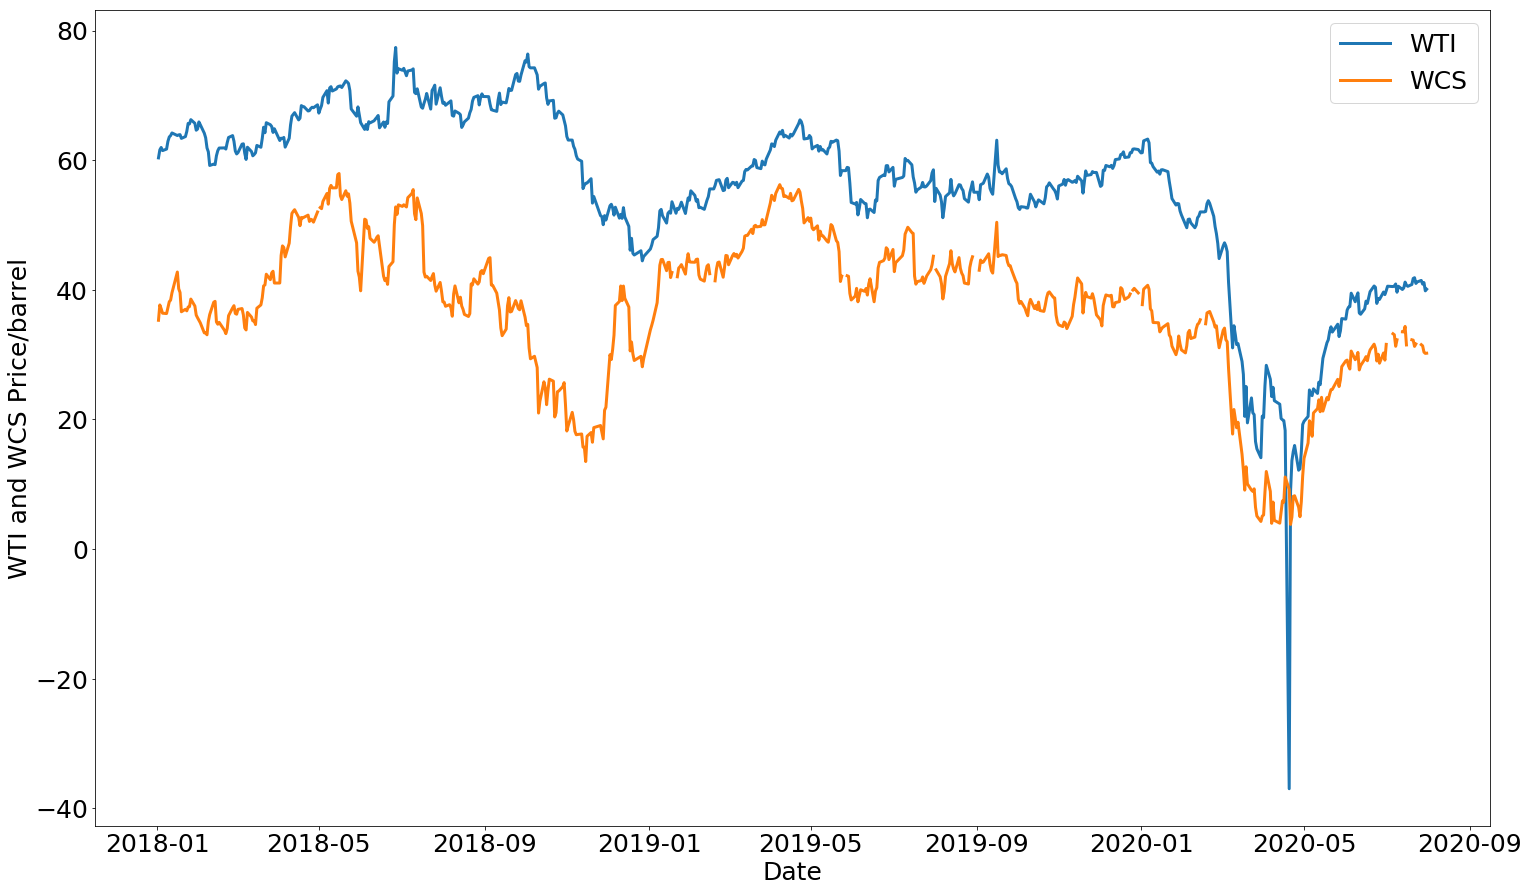

In [26]:
x = Join_WTI_WCS['DateTime']
y1 = Join_WTI_WCS['WTI']
y2 = Join_WTI_WCS['WCS']
plt.figure(figsize=(25, 15))
plt.plot(x, y1, linewidth=3)
plt.plot(x, y2, linewidth=3)
plt.xlabel('Date', fontsize=25)
plt.xticks(fontsize= 25)
plt.yticks(fontsize= 25)
plt.ylabel('WTI and WCS Price/barrel', fontsize=25)
plt.legend(loc='best', fontsize=25)
plt.show()

## 6.2. Plot the Interpolated WTI and WCS over time

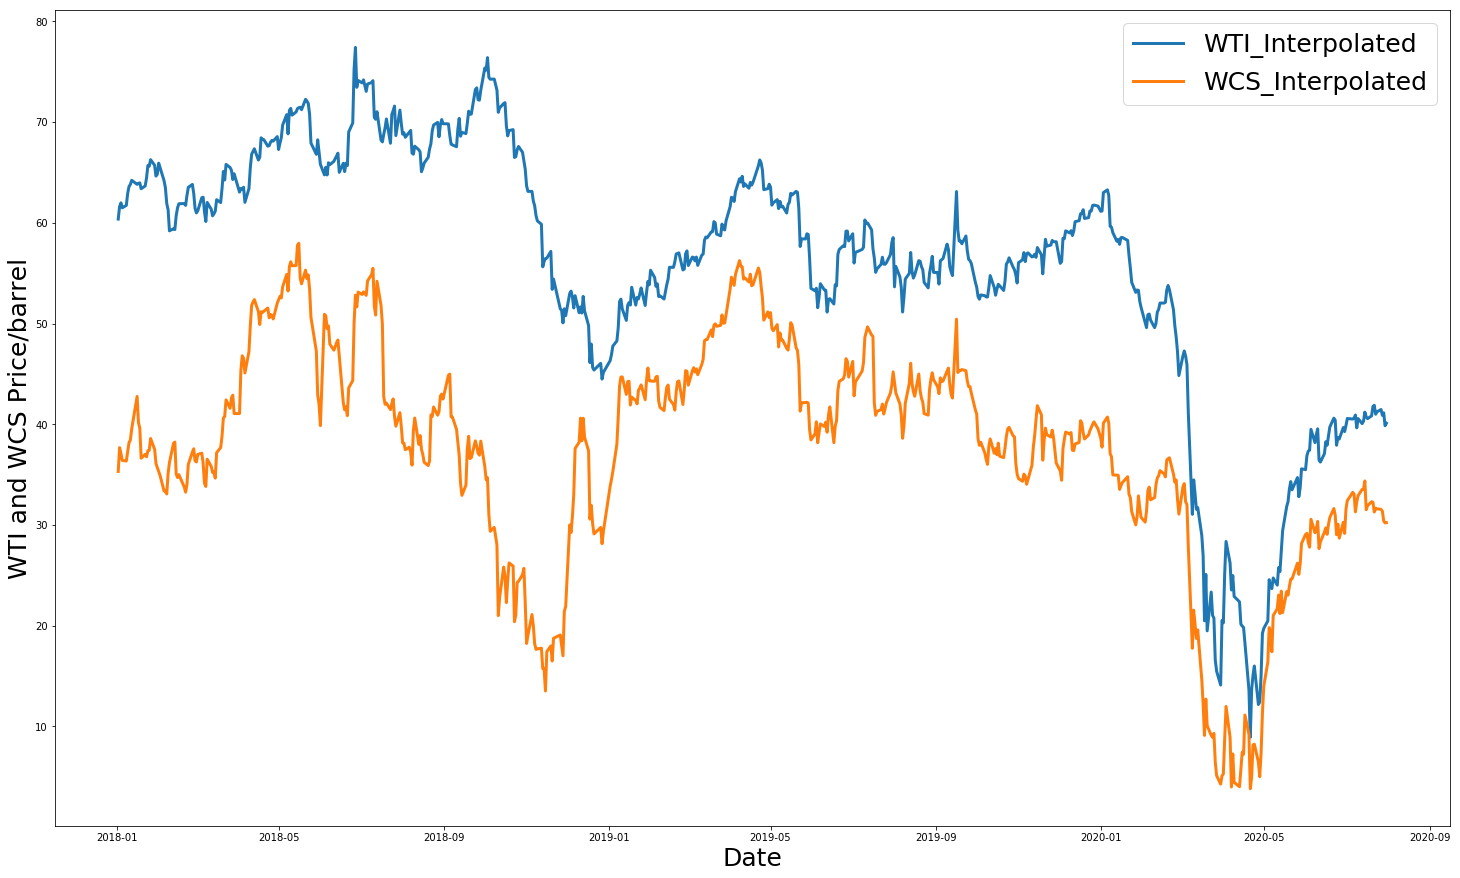

In [43]:
x = Join_WTI_WCS['DateTime']
y1 = Join_WTI_WCS['WTI_Interpolated']
y2 = Join_WTI_WCS['WCS_Interpolated']
plt.figure(figsize=(25, 15))
plt.plot(x, y1, linewidth=3)
plt.plot(x, y2, linewidth=3)
plt.xlabel('Date', fontsize=25)
plt.ylabel('WTI and WCS Price/barrel', fontsize=25)
plt.legend(loc='best', fontsize=25)
plt.show()

## 6.3. Plot the difference between the original WTI and WCS over time 

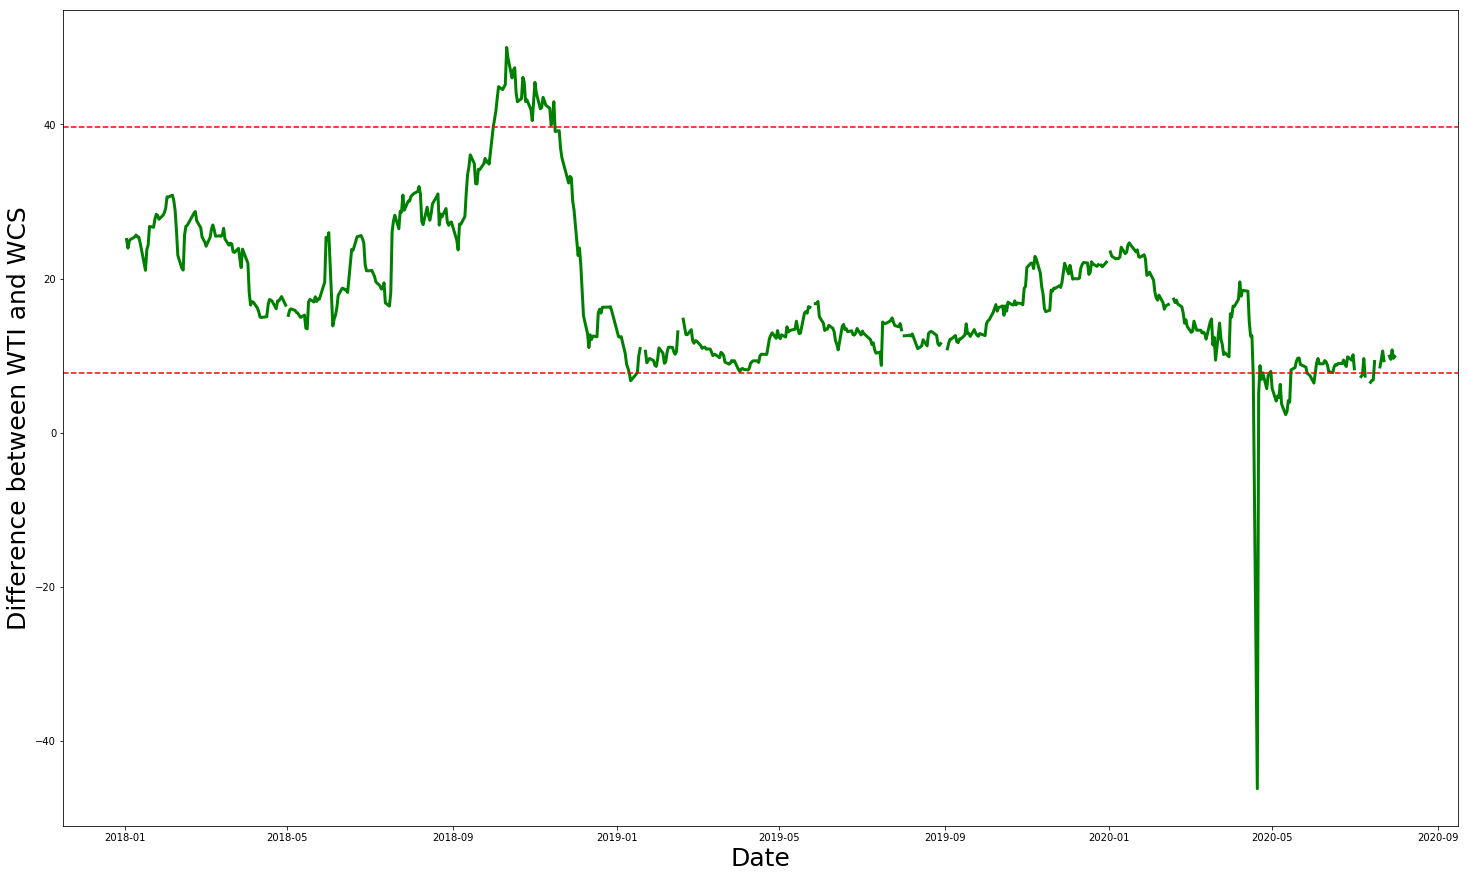

In [48]:
x = Join_WTI_WCS['DateTime'] 
y = Join_WTI_WCS['WTI'] - Join_WTI_WCS['WCS']
plt.figure(figsize=(25, 15))
plt.plot(x, y, c='g', linewidth=3)
plt.axhline(39.67187956178252, c='r', linestyle= '--')
plt.axhline(7.753828507874972, c='r', linestyle= '--')
plt.xlabel('Date', fontsize=25)
plt.ylabel('Difference between WTI and WCS', fontsize=25)
plt.show()

## 6.4. Plot the difference between the interpolated WTI and WCS over time

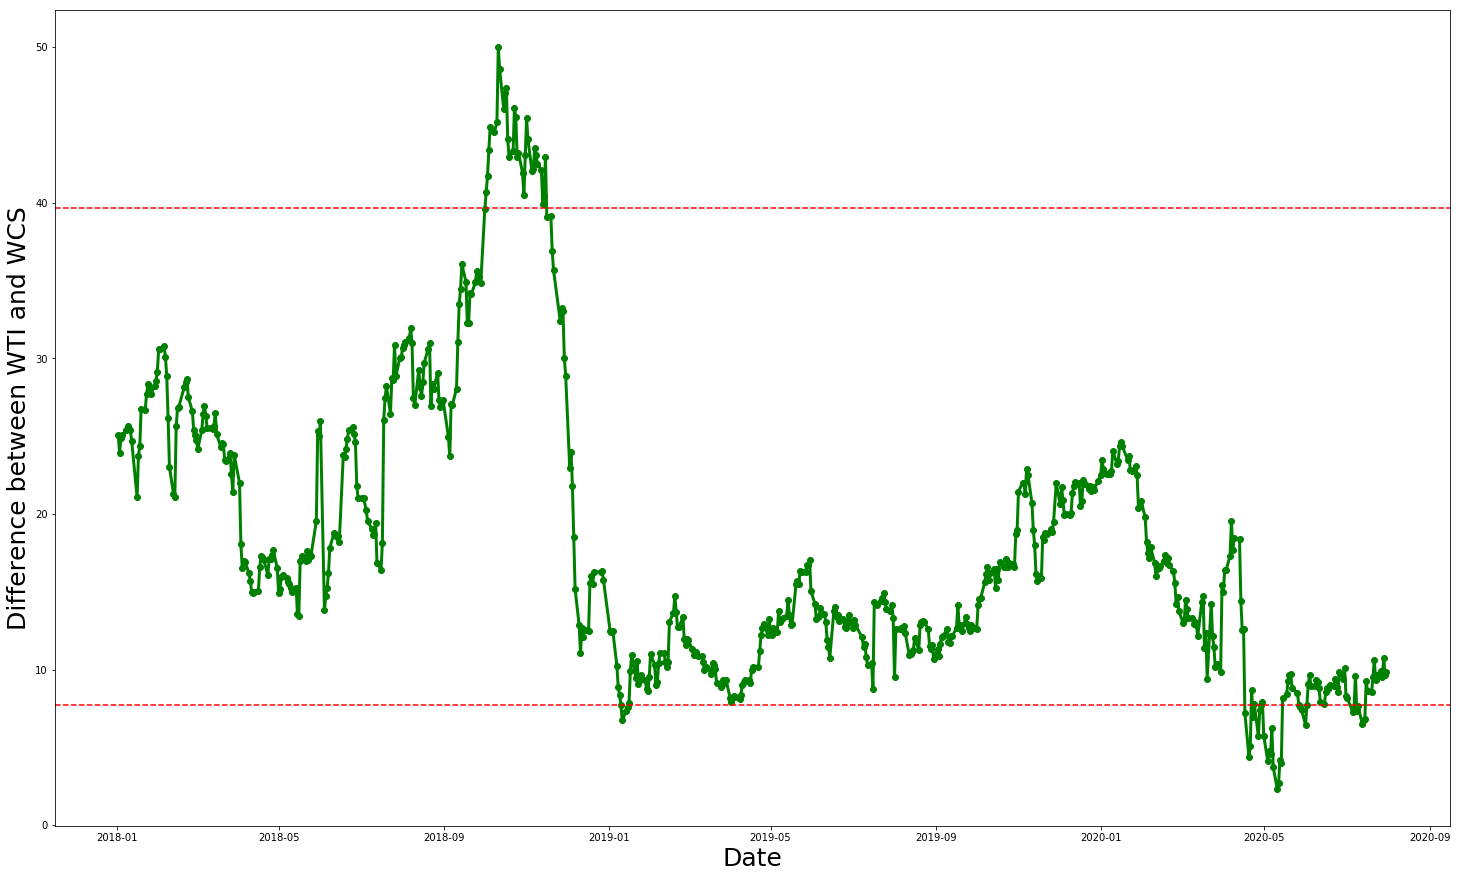

In [49]:
x = Join_WTI_WCS['DateTime']
y = Join_WTI_WCS['WTI_WCS_diff']
plt.figure(figsize=(25, 15))
plt.plot(x, y, c='g', linewidth=3, marker ='o')
plt.axhline(39.67187956178252, c='r', linestyle= '--')
plt.axhline(7.753828507874972, c='r', linestyle= '--')
plt.xlabel('Date', fontsize=25)
plt.ylabel('Difference between WTI and WCS', fontsize=25)
plt.show()

In [50]:
for q in [5, 10, 90, 95]:
    print ("{}%% percentile: {}".format (q, np.percentile(Join_WTI_WCS['WTI_WCS_diff'], q)))

5%% percentile: 7.750372050059375
10%% percentile: 8.898088381015583
90%% percentile: 30.524087049154048
95%% percentile: 39.35494053496666


## 6.5. Plot histogram of the difference between the interpolated WTI and WCS

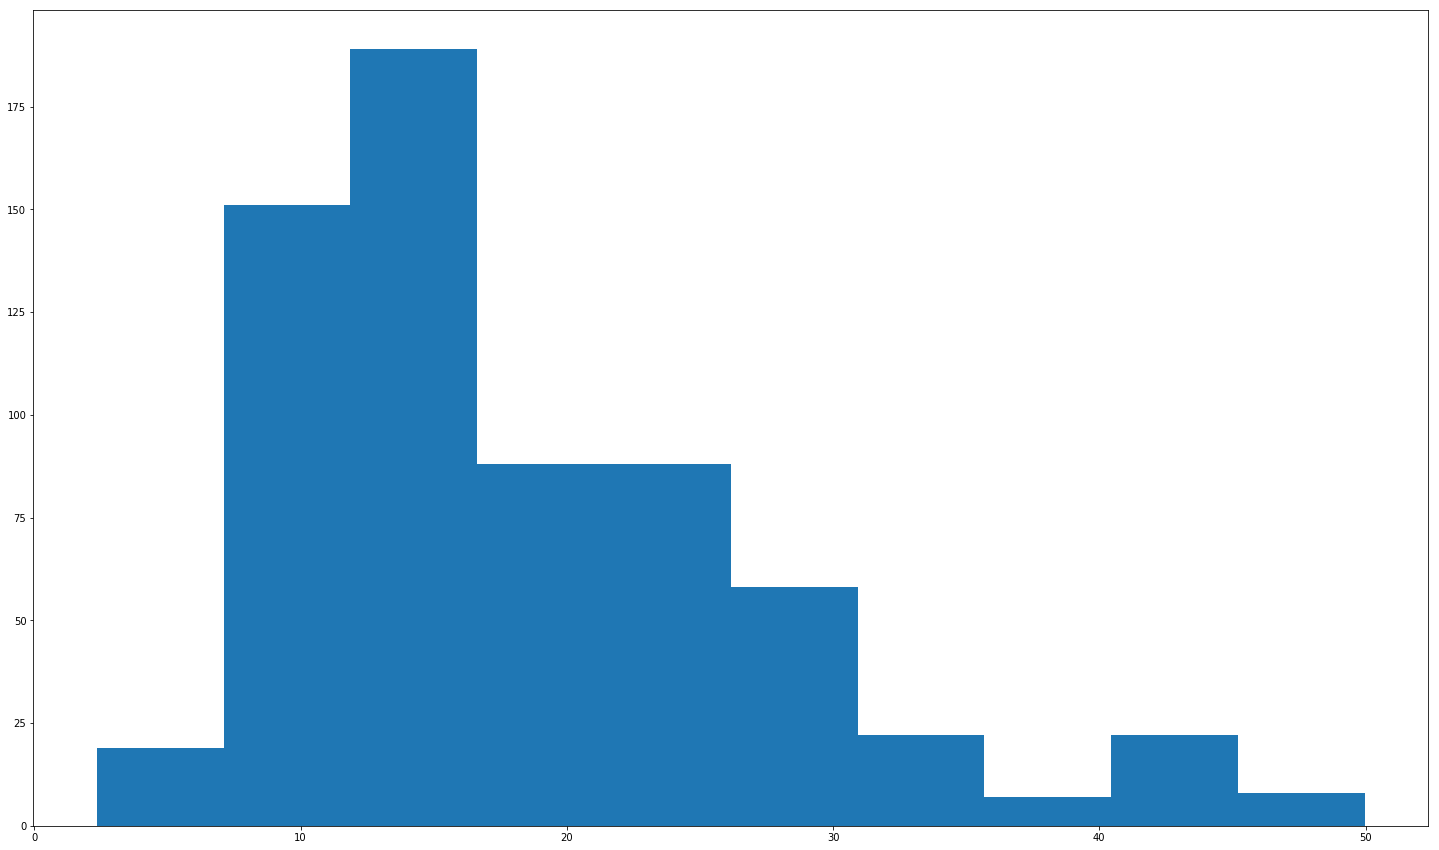

In [51]:
x = Join_WTI_WCS['DateTime']
y = Join_WTI_WCS['WTI_WCS_diff']
plt.figure(figsize=(25, 15))
plt.hist(y)
plt.show()

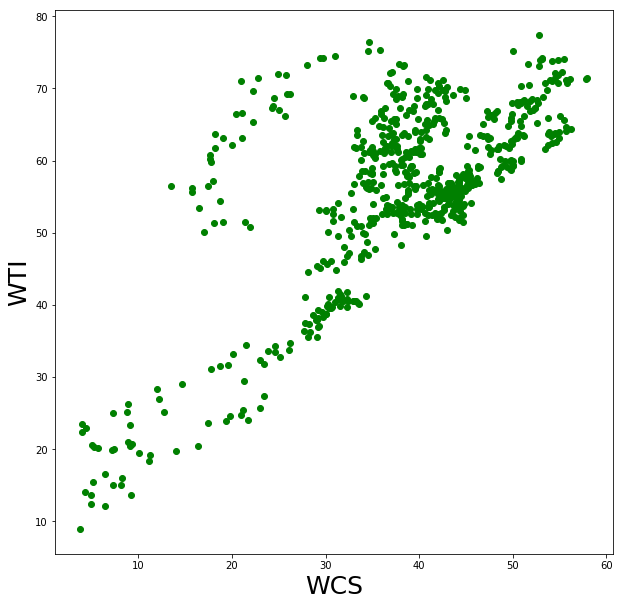

In [52]:
x = Join_WTI_WCS['WCS_Interpolated']
y = Join_WTI_WCS['WTI_Interpolated']
plt.figure(figsize=(10, 10))
plt.scatter(x, y, c='g')
# plt.axhline(39.67187956178252, c='r', linestyle= '--')
# plt.axhline(7.753828507874972, c='r', linestyle= '--')
plt.xlabel('WCS', fontsize=25)
plt.ylabel('WTI', fontsize=25)
plt.show()
# plt.scatter(Join_WTI_WCS['WCS_Interpolated'], Join_WTI_WCS['WTI_Interpolated'])
# plt.show()